In [1]:
# Eri Osta
# ads829

## Lab 4A

Lab 4 consist of two exercises. This is the first exercise will cover JSON as well as some string processing, ```DataFrame```s, and plotting.

In this exercise, you will write a program that reads an external JSON file and you will also visualize some of the content.


### About the JSON File

The JSON file ```prize.json``` contains data about nobel prizes retrieved from github.com.

### Tasks 

You will do the following tasks:

1. Read the file as a JSON.

2. Traverse the JSON and extract the following data and add this data to a ```DataFrame``` with the following columns:
    * Year
    * Category
    * Number of people who share a prize
    * Watch out: sometimes several people share one prize.
    
    
3. Traverse the data frame to find the number of total given nobel prizes in the different categories and show the result in a new data frame
    * Display the data in a new DataFrame
    
    
4. Traverse the data frame from task 2 to find the average number people who share a prize in the different categorieso
    * Display the data in a new DataFrame
    * use panda's groupby operation and mean method for this task

5. Plot the following graphs with the average number of people sharing a nobel prize in the different categories
     * bar plot (for the past 20 years)
     * box plot for the entire time frame
     * experiment with color palettes and styles of the graphs and create a second pair of the above graphs

6. Answer the question below.

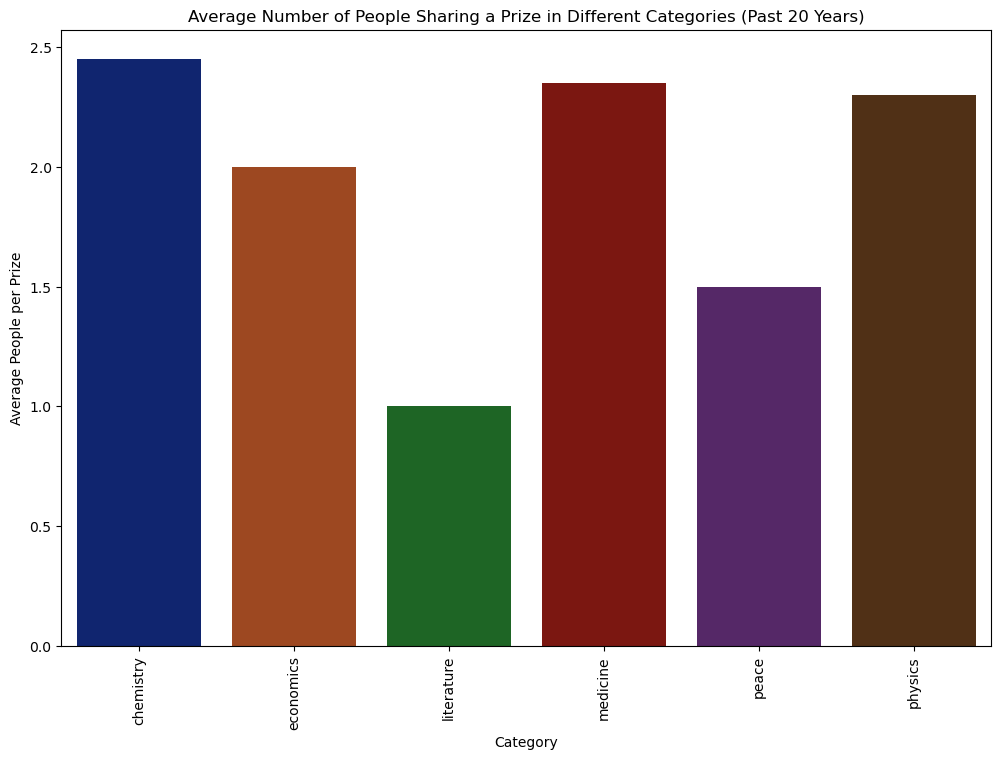

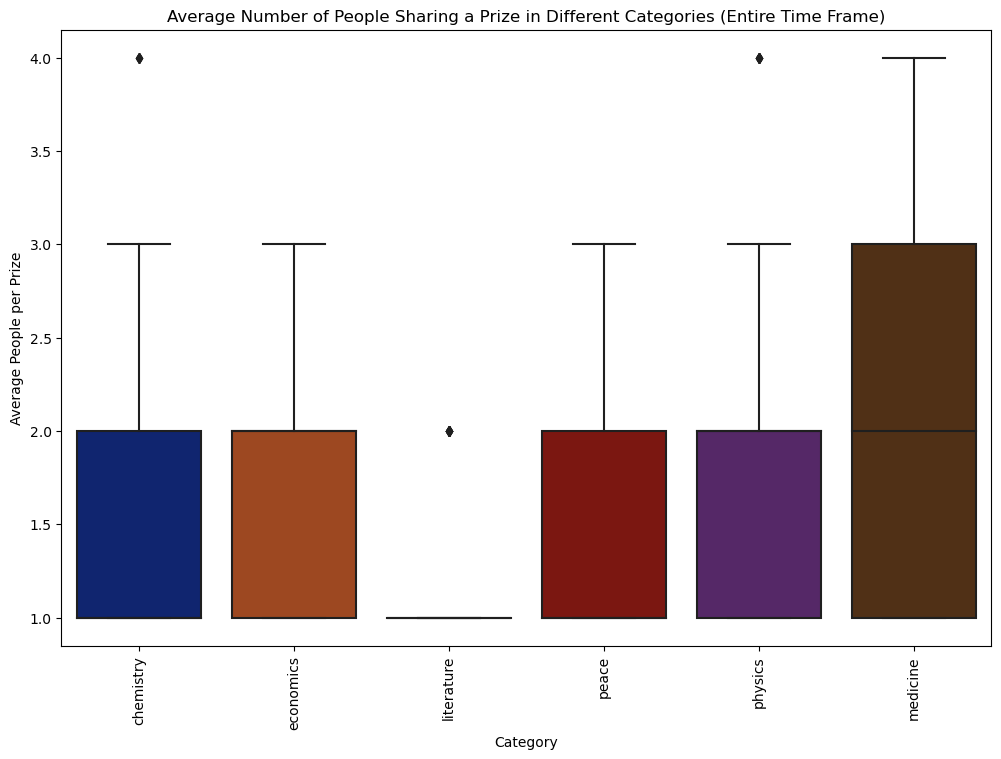

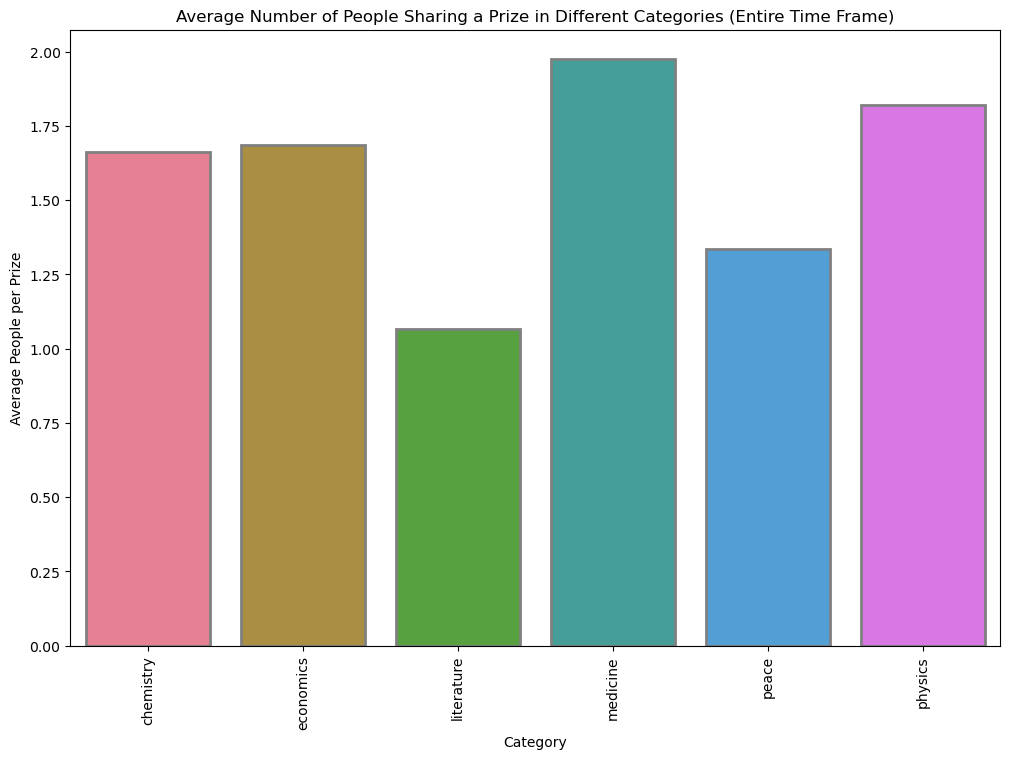

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

#Starter Code
f = open('prize.json', mode='r', encoding = 'utf-8-sig' )

#loading the json file into a python dictionary
j = json.load(f)

# Flattening data nested in dictionary 'prizes'. The new dictionary is easier to handle
new_j = pd.json_normalize(j['prizes']) 

#Creating a DataFrame from the data of the json file
df = pd.DataFrame.from_dict(new_j)

#Preparing a DataFrame I want to use for my data analysis
final_dataframe = pd.DataFrame()
#I need to list I build in a loop which I later add as a new column to my dataframe
data = []

first_laureate = {}

#Extracting the needed data from the original DataFrame and the data to new DataFrame by traversing through the DataFrame line by line
for index, rows in df.iterrows():
    final_dataframe['Year'] = df['year'].astype("int")
    final_dataframe['Category'] = df['category']
    laureates_per_price = rows['laureates'] # Extracting only the needed data from the nested dictionary, step 1
    if type( laureates_per_price ) == list: # Making sure its a proper entry
        first_laureate = laureates_per_price[0] # Extracting the data from the nested dictionary, step 2
    temp = int(first_laureate['share'])   # Extracting the data from the nested dictionary and making it integer value, step 3
    data.append(temp)     # Writing that new data point into a list which I later add as a new column to my new DataFrame

#Continue here with your code
final_dataframe['Share'] = data

# Grouping the data by category and finding the total number of prizes in each category
total_prizes_df = pd.DataFrame({'Total Prizes': final_dataframe.groupby(['Category'])['Share'].sum()})

# Grouping the data by category and finding the average number of people sharing a prize in each category
avg_people_per_prize_df = pd.DataFrame({'Average People per Prize': final_dataframe.groupby(['Category'])['Share'].mean()})

# Plotting the bar plot of average number of people sharing a prize in each category for the past 20 years
recent_20_years_avg = final_dataframe.query('Year >= 2003').groupby(['Category'])['Share'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=recent_20_years_avg.index, y=recent_20_years_avg.values, palette='dark')
plt.title("Average Number of People Sharing a Prize in Different Categories (Past 20 Years)")
plt.xlabel("Category")
plt.ylabel("Average People per Prize")
plt.xticks(rotation=90)
plt.show()

# Plotting the box plot of average number of people sharing a prize in each category for the entire time frame
plt.figure(figsize=(12, 8))
sns.boxplot(x=final_dataframe['Category'], y=final_dataframe['Share'], palette='dark')
plt.title("Average Number of People Sharing a Prize in Different Categories (Entire Time Frame)")
plt.xlabel("Category")
plt.ylabel("Average People per Prize")
plt.xticks(rotation=90)
plt.show()

# Plotting the bar plot of average number of people sharing a prize in each category for the entire time frame with a different color palette and style
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_people_per_prize_df.index, y=avg_people_per_prize_df['Average People per Prize'], palette='husl',
            linewidth=2, edgecolor="gray")
plt.title("Average Number of People Sharing a Prize in Different Categories (Entire Time Frame)")
plt.xlabel("Category")
plt.ylabel("Average People per Prize")
plt.xticks(rotation=90)
plt.show()

## Questions

Answer the following question:

1. When would you use a bar plot and when a box plot?

## Answers

Use a bar plot for nominal or ordinal categorical data and for continuous data that has been aggregated into categories.

Use a boxplot to display the distribution of a continuous variable. 
